In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Online_Course_Completion.csv')
df.head()

,Student_ID,Age,Gender,Country,Course_Type,Hours_Studied_Week,Previous_Education,Course_Duration_Weeks,Course_Rating,Completed
0,eb6f2b1a-c8c6-4baf-9207-464f3fe4ccae,27.0,Male,Australia,Full-time,13,High School,22,2.281933,0
1,c419f819-336e-49ce-b098-3d860ee47a7f,50.0,Male,Germany,Full-time,2,Graduate,34,4.387644,1
2,7b004f8e-9246-4bad-bcbb-4d339e7be841,35.0,Male,UK,Part-time,5,High School,27,1.085274,0
3,3a67c080-1d70-41c2-84ce-2df1fc697d70,53.0,Male,Australia,Full-time,5,Graduate,12,3.911682,1
4,c4819cd6-0b4d-475e-9aa5-c276c08558e0,23.0,Female,USA,Part-time,6,Undergraduate,25,2.794620,0


In [4]:
df.shape

(1100, 10)

In [5]:
data_cols=df.columns.tolist()
print(data_cols)

['Student_ID', 'Age', 'Gender', 'Country', 'Course_Type', 'Hours_Studied_Week', 'Previous_Education', 'Course_Duration_Weeks', 'Course_Rating', 'Completed']


In [7]:
df.dtypes

Student_ID                object
Age                      float64
Gender                    object
Country                   object
Course_Type               object
Hours_Studied_Week         int64
Previous_Education        object
Course_Duration_Weeks      int64
Course_Rating            float64
Completed                  int64
dtype: object

In [8]:
df.describe()

,Age,Hours_Studied_Week,Course_Duration_Weeks,Course_Rating,Completed
count,1046.000000,1100.000000,1100.000000,1047.000000,1100.000000
mean,38.193117,10.128182,27.567273,2.910478,0.499091
std,12.174371,5.512739,14.093282,1.143700,0.500227
min,18.000000,1.000000,4.000000,1.001747,0.000000
25%,27.000000,5.000000,15.750000,1.947568,0.000000
50%,38.000000,10.000000,28.000000,2.848221,0.000000
75%,49.000000,15.000000,40.000000,3.872562,1.000000
max,59.000000,19.000000,51.000000,4.997699,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             1100 non-null   object 
 1   Age                    1046 non-null   float64
 2   Gender                 1044 non-null   object 
 3   Country                1100 non-null   object 
 4   Course_Type            1100 non-null   object 
 5   Hours_Studied_Week     1100 non-null   int64  
 6   Previous_Education     1100 non-null   object 
 7   Course_Duration_Weeks  1100 non-null   int64  
 8   Course_Rating          1047 non-null   float64
 9   Completed              1100 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 86.1+ KB


In [10]:
df.isnull().sum()

Student_ID                0
Age                      54
Gender                   56
Country                   0
Course_Type               0
Hours_Studied_Week        0
Previous_Education        0
Course_Duration_Weeks     0
Course_Rating            53
Completed                 0
dtype: int64

In [11]:
df.drop(columns=['Student_ID'],inplace=True)  #no need to create object again

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1046 non-null   float64
 1   Gender                 1044 non-null   object 
 2   Country                1100 non-null   object 
 3   Course_Type            1100 non-null   object 
 4   Hours_Studied_Week     1100 non-null   int64  
 5   Previous_Education     1100 non-null   object 
 6   Course_Duration_Weeks  1100 non-null   int64  
 7   Course_Rating          1047 non-null   float64
 8   Completed              1100 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 77.5+ KB


In [13]:
df.isnull().sum()

Age                      54
Gender                   56
Country                   0
Course_Type               0
Hours_Studied_Week        0
Previous_Education        0
Course_Duration_Weeks     0
Course_Rating            53
Completed                 0
dtype: int64

In [14]:
num_columns=df.select_dtypes(include=['float64','int64']).columns  #numerical columns
cat_columns=df.select_dtypes(include=['object']).columns          #categorical columns
print(num_columns)
print(cat_columns)

Index(['Age', 'Hours_Studied_Week', 'Course_Duration_Weeks', 'Course_Rating',
       'Completed'],
      dtype='object')
Index(['Gender', 'Country', 'Course_Type', 'Previous_Education'], dtype='object')


In [15]:
df[num_columns]=df[num_columns].fillna(df[num_columns].mean())

In [16]:
df[cat_columns]=df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [17]:
df.isnull().sum()

Age                      0
Gender                   0
Country                  0
Course_Type              0
Hours_Studied_Week       0
Previous_Education       0
Course_Duration_Weeks    0
Course_Rating            0
Completed                0
dtype: int64

In [18]:

import sklearn
print(sklearn.__version__)

1.6.0


In [19]:
# to do Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for column in cat_columns:
    df[column]=label_encoder.fit_transform(df[column])

In [2]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('Online_Course_Completion.csv')

# Check the first few rows of the dataframe
print(df.head())

# Check the shape of the dataframe
print(df.shape)

# List all columns
data_cols = df.columns.tolist()
print(data_cols)

# Check data types of the columns
print(df.dtypes)

# Get statistical summary of the numerical columns
print(df.describe())

# Get info about the dataframe (including non-null counts)
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Drop the 'Student_ID' column as it's not necessary
df.drop(columns=['Student_ID'], inplace=True)

# Confirm the changes
print(df.info())
print(df.isnull().sum())

# Identify numerical and categorical columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Numerical columns
cat_columns = df.select_dtypes(include=['object']).columns  # Categorical columns
print("Numerical columns:", num_columns)
print("Categorical columns:", cat_columns)

# Handle missing values for numerical columns (using the mean)
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

# Handle missing values for categorical columns (using the mode)
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

# Confirm there are no more missing values
print(df.isnull().sum())

# Importing scikit-learn
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")

# Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Scaling numerical columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling
df[num_columns] = scaler.fit_transform(df[num_columns])

# Confirm the final dataframe structure
print(df.head())


                             Student_ID   Age  Gender    Country Course_Type  \
0  eb6f2b1a-c8c6-4baf-9207-464f3fe4ccae  27.0    Male  Australia   Full-time   
1  c419f819-336e-49ce-b098-3d860ee47a7f  50.0    Male    Germany   Full-time   
2  7b004f8e-9246-4bad-bcbb-4d339e7be841  35.0    Male         UK   Part-time   
3  3a67c080-1d70-41c2-84ce-2df1fc697d70  53.0    Male  Australia   Full-time   
4  c4819cd6-0b4d-475e-9aa5-c276c08558e0  23.0  Female        USA   Part-time   

   Hours_Studied_Week Previous_Education  Course_Duration_Weeks  \
0                  13        High School                     22   
1                   2           Graduate                     34   
2                   5        High School                     27   
3                   5           Graduate                     12   
4                   6      Undergraduate                     25   

   Course_Rating  Completed  
0       2.281933          0  
1       4.387644          1  
2       1.085274          

In [2]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('Online_Course_Completion.csv')

# Check the first few rows of the dataframe
print(df.head())

# Check the shape of the dataframe
print(df.shape)

# List all columns
data_cols = df.columns.tolist()
print(data_cols)

# Check data types of the columns
print(df.dtypes)

# Get statistical summary of the numerical columns
print(df.describe())

# Get info about the dataframe (including non-null counts)
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Drop the 'Student_ID' column as it's not necessary
df.drop(columns=['Student_ID'], inplace=True)

# Confirm the changes
print(df.info())
print(df.isnull().sum())

# Identify numerical and categorical columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Numerical columns
cat_columns = df.select_dtypes(include=['object']).columns  # Categorical columns
print("Numerical columns:", num_columns)
print("Categorical columns:", cat_columns)

# Handle missing values for numerical columns (using the mean)
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

# Handle missing values for categorical columns (using the mode)
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

# Confirm there are no more missing values
print(df.isnull().sum())

# Importing scikit-learn
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")

# Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Scaling numerical columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling
df[num_columns] = scaler.fit_transform(df[num_columns])

# Confirm the final dataframe structure
print(df.head())


                             Student_ID   Age  Gender    Country Course_Type  \
0  eb6f2b1a-c8c6-4baf-9207-464f3fe4ccae  27.0    Male  Australia   Full-time   
1  c419f819-336e-49ce-b098-3d860ee47a7f  50.0    Male    Germany   Full-time   
2  7b004f8e-9246-4bad-bcbb-4d339e7be841  35.0    Male         UK   Part-time   
3  3a67c080-1d70-41c2-84ce-2df1fc697d70  53.0    Male  Australia   Full-time   
4  c4819cd6-0b4d-475e-9aa5-c276c08558e0  23.0  Female        USA   Part-time   

   Hours_Studied_Week Previous_Education  Course_Duration_Weeks  \
0                  13        High School                     22   
1                   2           Graduate                     34   
2                   5        High School                     27   
3                   5           Graduate                     12   
4                   6      Undergraduate                     25   

   Course_Rating  Completed  
0       2.281933          0  
1       4.387644          1  
2       1.085274          

In [10]:
# Import necessary functions from sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# Drop the target column 'Completed' to create feature set 'x'
x = df.drop('Completed', axis=1)
# Separate the target variable 'Completed' into 'y'
y = df['Completed']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

# Train the model using the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test data
rf_pred = rf_model.predict(x_test)

# Calculate accuracy and confusion matrix
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Print the results
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)


Random Forest Accuracy: 0.5
Random Forest Confusion Matrix:
 [[51 57]
 [53 59]]


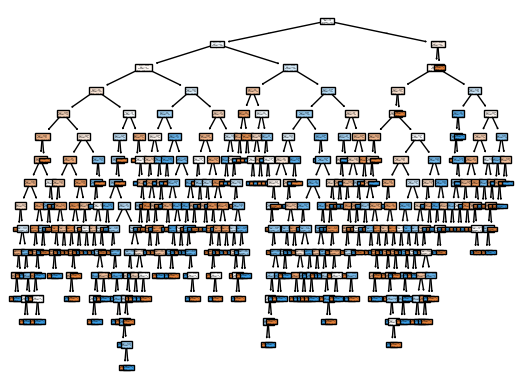

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()


In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Prepare the data
X = data[["Age", "Hours_Studied_Week", "Course_Duration_Weeks", "Course_Rating"]]  # Features
y = data["Completed"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:")
print(accuracy)


Confusion Matrix:
[[51 57]
 [57 55]]

Accuracy Score:
0.4818181818181818


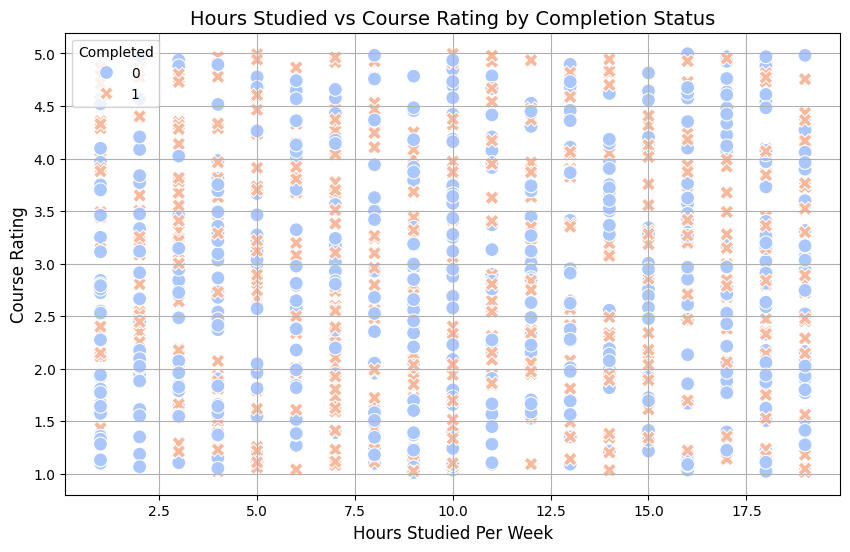

In [24]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Online_Course_Completion.csv')

# Visualization: Scatter plot for Hours_Studied_Week vs Course_Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Hours_Studied_Week",
    y="Course_Rating",
    hue="Completed",
    style="Completed",
    palette="coolwarm",
    s=100,
)
plt.title("Hours Studied vs Course Rating by Completion Status", fontsize=14)
plt.xlabel("Hours Studied Per Week", fontsize=12)
plt.ylabel("Course Rating", fontsize=12)
plt.legend(title="Completed", loc="upper left")
plt.grid(True)
plt.show()


In [30]:
import pickle

# Assuming your trained model is stored in 'model'
# Save the model to a pickle file
file_path = 'Online_Course_Completion.pkl'  # Change to .pkl extension

with open(file_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {file_path}")


Model saved as Online_Course_Completion.pkl
